## Script para realizar a análise dos clusters gerados

---

**1)** Execução Inicial:
O script inicia com a leitura do arquivo:  
**`f'./saida/06_3_DOU2_portarias_mgi_tratado_NER_lematizado_embeddingsUSE_SBERT_Reducao_Kmeans_DBSCAN_HDBSCAN.parquet'`**  
Caso este arquivo não exista, executar o notebook **`06_3_Clustering_HDBSCAN.ipynb`** para gerar os dados necessários.

## Bibliotecas

In [12]:
# Bibliotecas para manipulação de dados e cálculo
import pandas as pd
import numpy as np

# Bibliotecas para visualização e criação de nuvem de palavras
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
douItem = 2
secao = f'Secao0{douItem}'

# Lê o arquivo Parquet
df_portarias_mgi = pd.read_parquet(f'./saida/06_3_DOU{secao}_portarias_mgi_tratado_NER_lematizado_embeddingsUSE_SBERT_Reducao_Kmeans_DBSCAN_HDBSCAN.parquet', engine='pyarrow')  # ou engine='fastparquet'

# Exibe as primeiras linhas do DataFrame
df_portarias_mgi.shape

(19258, 119)

In [16]:
for coluna in df_portarias_mgi.columns:
    print(coluna)

id
name
idOficio
pubName
artType
pubDate
artClass
artCategory
artSize
artNotes
numberPage
pdfPage
editionNumber
highlightType
highlightPriority
highlight
highlightimage
highlightimagename
idMateria
Identifica
Data
Ementa
Titulo
SubTitulo
TextoHTML
file_name
zip_name
Ano
Mes
Texto
Total_palavras
TextoTratado
TextoTratado_TotalPalavras
Texto_sem_nomes
Nomes
TextoTratadoSemNomes
TextoTratadoSemNomes_TotalPalavras
TextoTratadoSemNomesLemmatized
TextoTratadoSemNomesLemmatized_TotalPalavras
USE_Embeddings1
USE_Embeddings4
SBERT_Embeddings1
SBERT_Embeddings4
USE_Embeddings1_PCA
USE_Embeddings4_PCA
SBERT_Embeddings1_PCA
SBERT_Embeddings4_PCA
USE_Embeddings1_TSNE
USE_Embeddings4_TSNE
SBERT_Embeddings1_TSNE
SBERT_Embeddings4_TSNE
USE_Embeddings1_KPCA
USE_Embeddings4_KPCA
SBERT_Embeddings1_KPCA
SBERT_Embeddings4_KPCA
USE_Embeddings1_PCA_TSNE
USE_Embeddings4_PCA_TSNE
SBERT_Embeddings1_PCA_TSNE
SBERT_Embeddings4_PCA_TSNE
USE_Embeddings1_UMAP
USE_Embeddings4_UMAP
SBERT_Embeddings1_UMAP
SBERT_Embeddi

In [15]:
df_portarias_mgi[['id', 'TextoHTML']].head()

,id,TextoHTML
0,30266027,"<p class=""identifica"">PORTARIA DE PESSOAL SGP/..."
1,30264410,"<p class=""identifica"">PORTARIA SGP/SEDGG/ME Nº..."
2,30265009,"<p class=""identifica"">PORTARIA DE PESSOAL SGP/..."
3,30265678,"<p class=""identifica"">PORTARIA DE PESSOAL SGP/..."
4,30266030,"<p class=""identifica"">PORTARIA DE PESSOAL SGP/..."


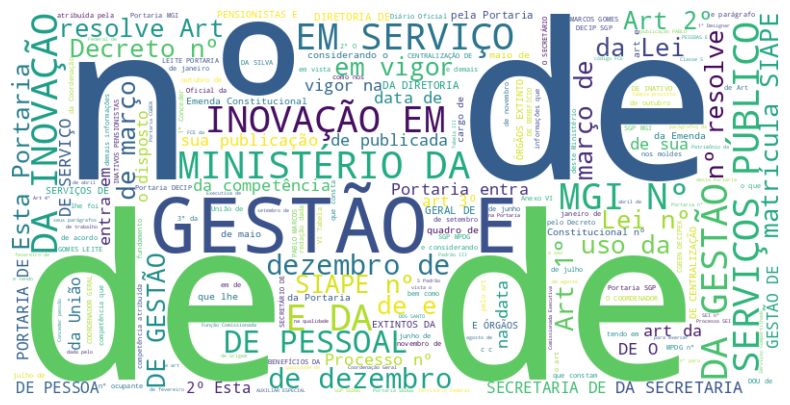

In [18]:
# Gerar um único texto concatenado a partir da coluna 'Texto'
textos_concatenados = " ".join(df_portarias_mgi['Texto'].dropna())

# Criar a nuvem de palavras
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis',
    max_words=200
).generate(textos_concatenados)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove os eixos
# plt.title('Nuvem de Palavras - Portarias MGI (Texto sem tratamento)', fontsize=16)
plt.show()


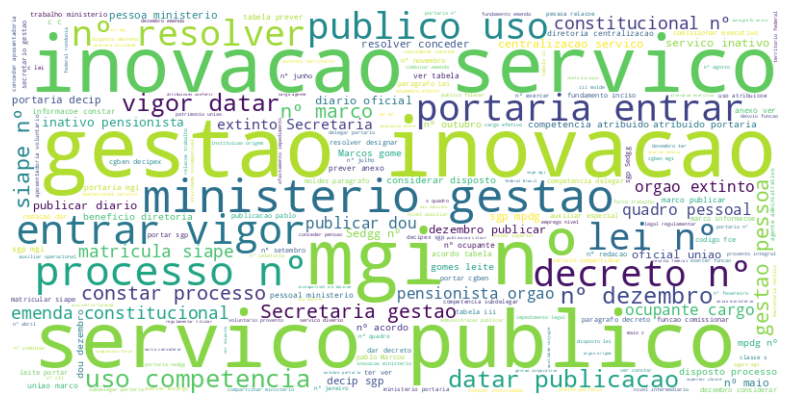

In [19]:
# Gerar um único texto concatenado a partir da coluna 'Texto'
textos_concatenados = " ".join(df_portarias_mgi['TextoTratadoSemNomesLemmatized'].dropna())

# Criar a nuvem de palavras
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis',
    max_words=200
).generate(textos_concatenados)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove os eixos
# plt.title('Nuvem de Palavras - Portarias MGI', fontsize=16)
plt.show()


In [6]:
contagem = df_portarias_mgi['USE_Embeddings1_PCA_kmeans'].value_counts()
print(contagem)

USE_Embeddings1_PCA_kmeans
0    7830
1    7292
2    4136
Name: count, dtype: int64


In [7]:
contagem = df_portarias_mgi['USE_Embeddings4_PCA_kmeans'].value_counts()
print(contagem)

USE_Embeddings4_PCA_kmeans
2    5042
1    4031
3    3804
0    3537
4    2844
Name: count, dtype: int64
